In [17]:
import algorithms_comp as alg
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib
import time
import pickle
import scipy
from scipy.stats import norm
from scipy.stats import multivariate_normal as mltnorm
from scipy.sparse import csr_matrix
from scipy.stats import randint
from scipy.stats import uniform
from scipy.optimize import minimize
import copy
import math
import time
from scipy.optimize import minimize
from scipy.sparse.linalg import svds
from scipy.linalg import svdvals
import scipy
from sklearn.datasets import load_svmlight_file
import pickle
from pathlib import Path
%matplotlib inline

In [18]:
from functions import *

In [19]:
from algorithms_comp import *

In [20]:
from utils import *

# Logistic regression

## heart

In [21]:
%%time
dataset = "heart"
A, y, m, n, sparsity_A = prepare_data(dataset)
print("Number of functions in the sum: ", m, ", dimension of the problem: ", n)
L, average_L, worst_L = compute_L(dataset, A)
denseA = A.toarray()
print("Smoothness constant of the sum: ", L)
print("Average smoothness constant   : ", average_L)
print("Worst smoothness constant     : ", worst_L)
print("Fraction of non-zero elemenst : ", sparsity_A)

Number of functions in the sum:  270 , dimension of the problem:  13
Smoothness constant of the sum:  26710.680138975204
Average smoothness constant   :  27147.725435185188
Worst smoothness constant     :  90369.64000000001
Fraction of non-zero elemenst :  0.750997150997151
CPU times: total: 15.6 ms
Wall time: 48 ms


### Find the solution

In [22]:
filename=dataset+"_x_init_all_ones"
x_init = np.ones(n)
l2 = 0
l1 = 0

In [23]:
%%time
param = [A, y, l2, False]
res_solver = minimize(logreg_loss, x_init, args = param, jac=logreg_grad, 
                      method='L-BFGS-B',
                      options={'maxiter':10000, 'disp':True}, tol=1e-30)

print(res_solver.success)
print(res_solver.fun)
print(res_solver)

True
0.34746010982135006
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.34746010982135006
        x: [-5.428e-02  1.087e+00 ...  1.157e+00  3.493e-01]
      nit: 1351
      jac: [-4.602e-09  1.073e-08 ...  6.711e-09  1.908e-09]
     nfev: 1598
     njev: 1598
 hess_inv: <13x13 LbfgsInvHessProduct with dtype=float64>
CPU times: total: 234 ms
Wall time: 260 ms


In [24]:
save_solution(dataset, l2, l1, np.array(res_solver.x), res_solver.fun)

# Parameters

In [25]:
l2 = 0
l1 = 0
sparse = False
sparse_full = True


bs = 100

x_star = read_solution(dataset, l2, l1)[0]
f_star = read_solution(dataset, l2, l1)[1]

num_of_non_zeros = 1
x_init = deepcopy(x_star)
shift_param = 0.5
x_init[0:num_of_non_zeros] += shift_param
N = 1000000

filename = dataset+"_init_first_"+str(num_of_non_zeros)+"_shift_"+str(shift_param)
delta = 0
t = 1e-8
param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, t]


print("f(x_0)-f(x^*) = ", logreg_loss(x_init, [A, y, l2, False, t]) - f_star)
epsilon = 1e-3

f(x_0)-f(x^*) =  13.239656902213394


# Tests

### ZO-AccSGD ()

In [10]:
N = 10000
stepsizes = [1]
Bs = [10, 50]
bs = A.shape[0]
rhos = [100]
deltas = [0]
for step_param in stepsizes:
    for B in Bs:
        for delta in deltas: 
            for rho in rhos:
                param = [negative_loglikelihood_loss, A, y, l2, sparse, sparse_full, L, delta, rho, B, t]
                Our_method = ZO_AccSGD_nllloss(filename, x_init, args=param, bs=bs, N=N,
                                    f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
                print('Finished with lr = {}, bs = {}, rho = {}'.format((1 / L) * step_param, bs, rho))

  8%|▊         | 762/10000 [00:05<01:03, 146.29it/s]


KeyboardInterrupt: 

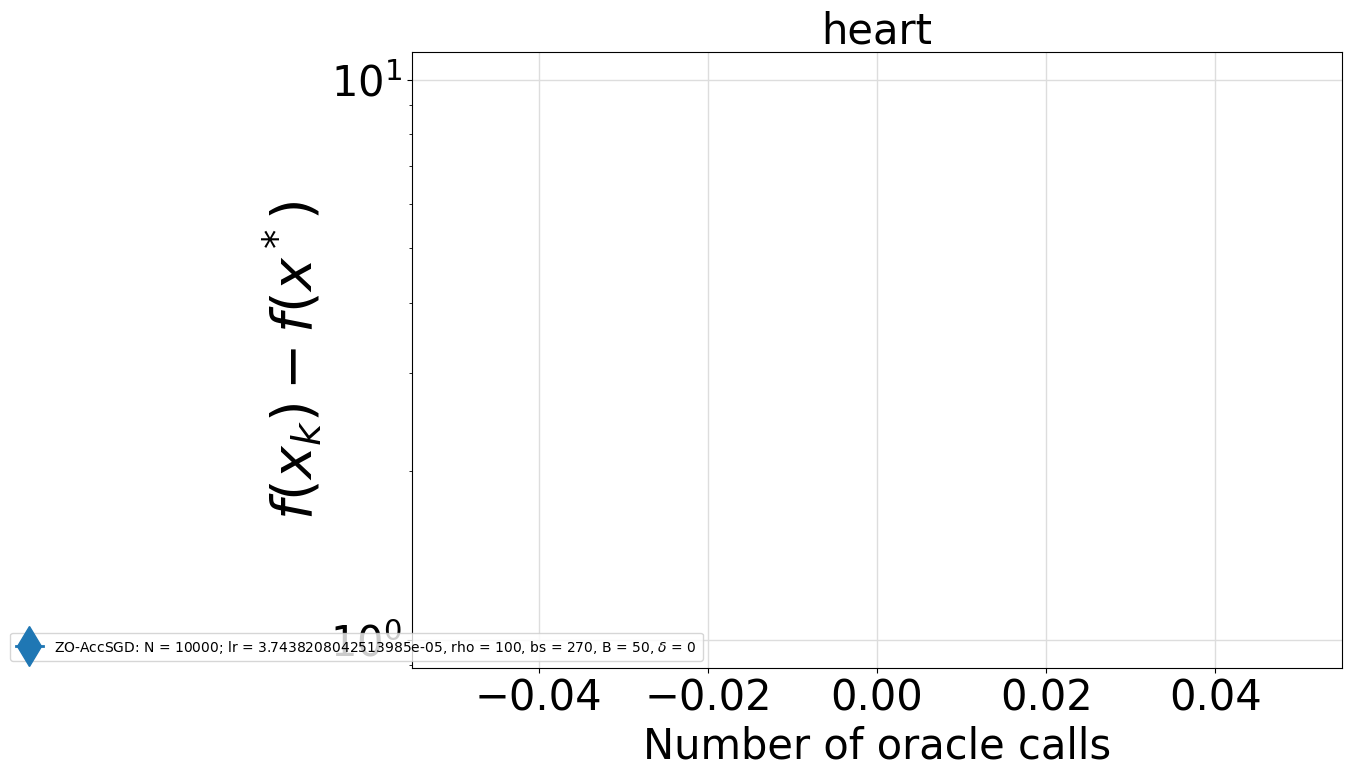

In [ ]:
methods = []
N = 10000
stepsizes = [1]
Bs = [50]
bs = A.shape[0]
rhos = [100]
deltas = [0]
for step_param in stepsizes:
    for B in Bs:
        for delta in deltas: 
            for rho in rhos:
                methods.append(['Our_algorithm nllloss', [step_param, N, delta, bs],
                            f"ZO-AccSGD: N = {N}; lr = {(1 / L) * step_param}, rho = {rho}, bs = {bs}, B = {B}, $\delta$ = {delta}", None])


mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 10
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (0.32,0)
legend_loc=4

save_fig = [True, filename+"Our_algorithm_nllloss"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

In [18]:
N = 10000
stepsizes = [1]
Bs = [10, 50]
bs = A.shape[0]
rhos = [100]
deltas = [0]
for step_param in stepsizes:
    for B in Bs:
        for delta in deltas: 
            for rho in rhos:
                param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, rho, B, t]
                Our_method = ZO_AccSGD(filename, x_init, args=param, bs=bs, N=N,
                                    f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
                print('Finished with lr = {}, bs = {}, rho = {}'.format((1 / L) * step_param, bs, rho))

100%|██████████| 10000/10000 [01:34<00:00, 105.94it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [06:31<00:00, 25.54it/s]

Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


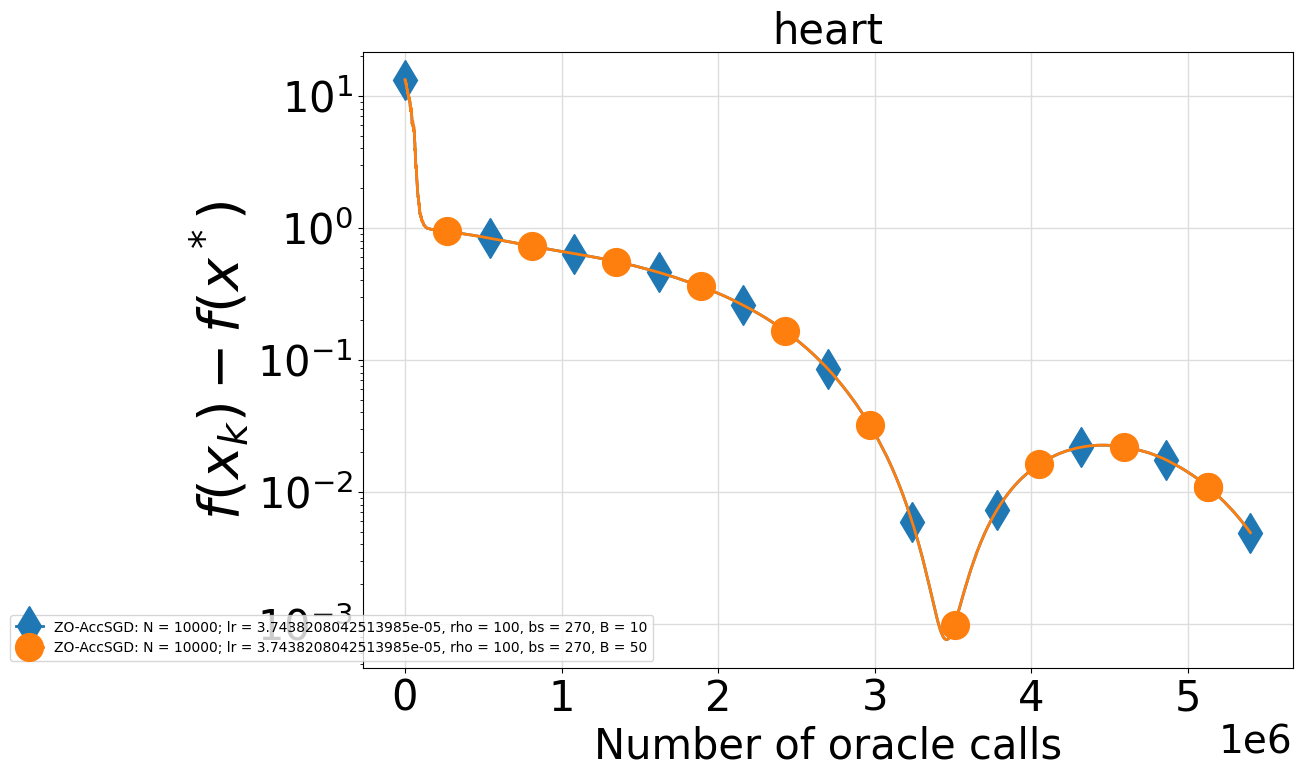

In [ ]:
methods = []
N = 10000
stepsizes = [1]
Bs = [10, 50, 1000]
bs = A.shape[0]
rhos = [100]
deltas = [0]
for step_param in stepsizes:
    for B in Bs:
        for rho in rhos:
            methods.append(['Our_algorithm logreg', [step_param, N, delta, bs],
                        f"ZO-AccSGD: N = {N}; lr = {(1 / L) * step_param}, rho = {rho}, bs = {bs}, B = {B}", None])


mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 10
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (0.32,0)
legend_loc=4

save_fig = [True, filename+"Our_algorithm"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

In [34]:
N = 20000
stepsize = 1
bss = [A.shape[0] // 8, A.shape[0] // 4, A.shape[0] // 2] 
deltas = [0]
for bs in bss: 
    rho = 1.2 * (4 * A.shape[1] * (3 * 125) / bs)
    param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, rho, t]
    Our_method = ZO_AccSGD(filename, x_init, args=param, bs=bs, N=N,
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print('Finished with lr = {}, bs = {}, rho = {}'.format((1 / L) * step_param, bs, rho))

100%|██████████| 20000/20000 [05:53<00:00, 56.55it/s]


Finished with lr = 3.7438208042513985e-05, bs = 33, rho = 709.090909090909


100%|██████████| 20000/20000 [12:03<00:00, 27.63it/s]


Finished with lr = 3.7438208042513985e-05, bs = 67, rho = 349.25373134328356


100%|██████████| 20000/20000 [24:40<00:00, 13.51it/s]

Finished with lr = 3.7438208042513985e-05, bs = 135, rho = 173.33333333333334


In [27]:
4 * A.shape[1] * (3 * 125) / A.shape[0]

72.22222222222223

FileNotFoundError: [Errno 2] No such file or directory: 'dump/heart_init_first_1_shift_0.5Our_algorithm1_epochs_20000_delta_0_batch_200400.txt'

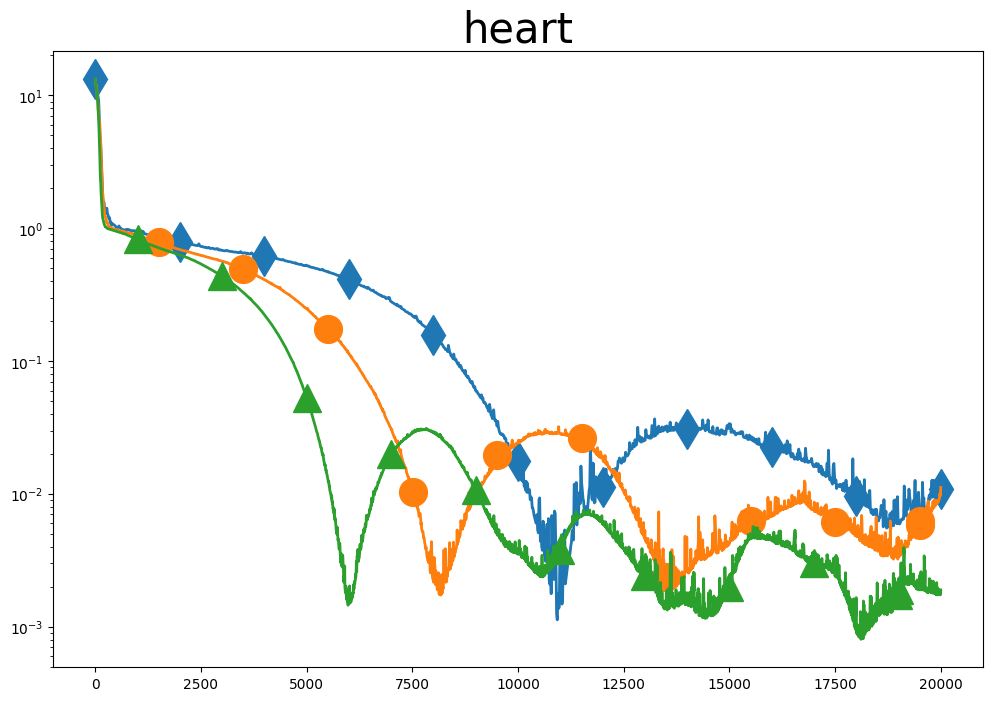

In [38]:
methods = []
N = 20000
stepsize = 1
bss = [A.shape[0] // 8, A.shape[0] // 4, A.shape[0] // 2] 
deltas = [0]
for bs in bss: 
    rho = 1.2 * (4 * A.shape[1] * (3 * 125) / bs)
    methods.append(['Our_algorithm logreg', [step_param, N, delta, bs, rho],
                        f"ZO-AccSGD: N = {N}; lr = {(1 / L) * step_param}, rho = {rho}, bs = {bs}, delta = {delta}", None])
    
methods.append(['Our_algorithm logreg', [step_param, N, delta, 200, 400],
                        f"ZO-AccSGD: N = {N}; lr = {(1 / L) * step_param}, rho = {rho}, bs = {bs}, delta = {delta}", None])
mode_y = 'func_vals'
mode_x = 'iters'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 10
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (0.32,0)
legend_loc=4

save_fig = [True, filename+"Our_algorithm"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

In [10]:
N = 10000
stepsizes = [1, 1e-1]
bs = [1000, A.shape[0], 4 * A.shape[1] * (3 * 125)]
rhos = [1e3, 1e5, 1e7]
deltas = [0]
t = 1e-2

for step_param in stepsizes:
    for bs_ in bs:
        for delta in deltas: 
            for rho in rhos:
                param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, rho, t]
                Our_method = ZO_AccSGD(filename, x_init, args=param, bs=bs_, N=N, f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
                print('Finished with lr = {}, bs = {}, rho = {}'.format((1 / L) * step_param, bs_, rho))

  0%|          | 14/10000 [00:13<2:42:27,  1.02it/s]


KeyboardInterrupt: 

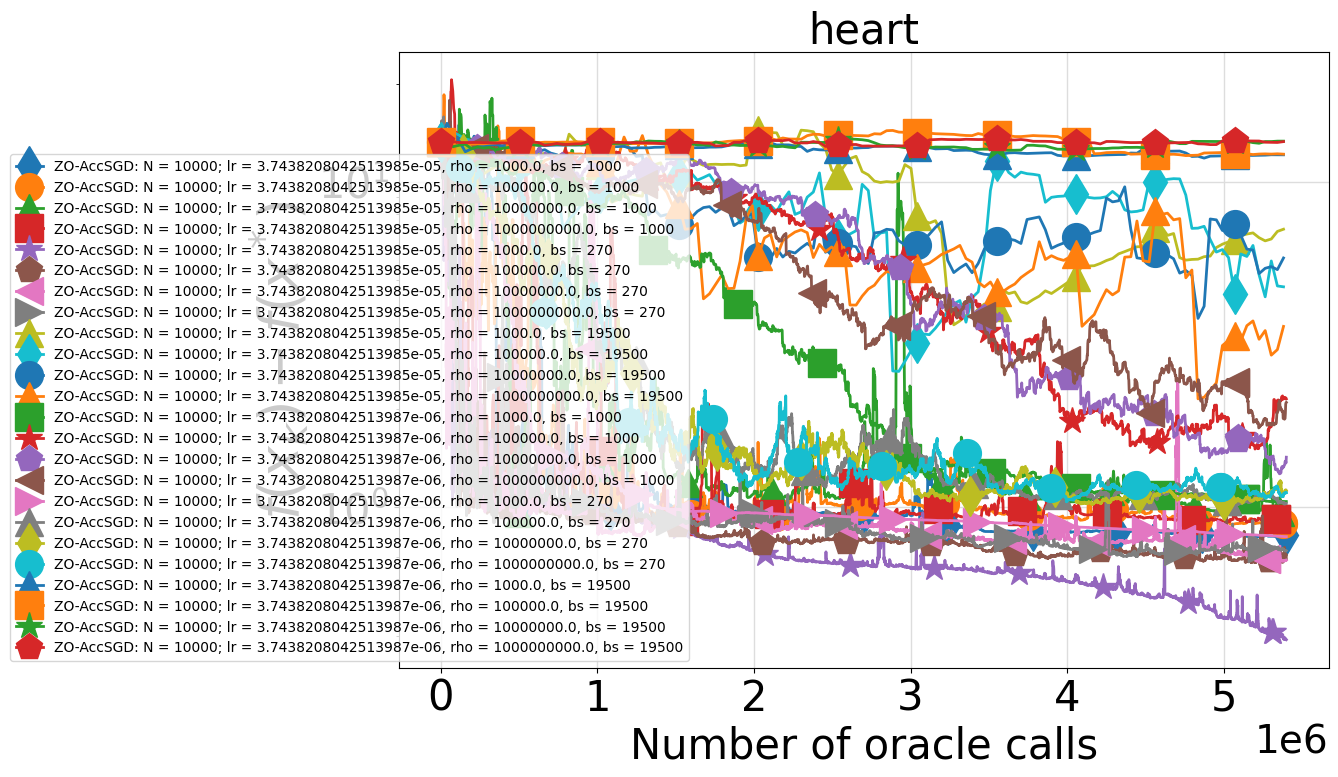

In [11]:
methods = []
N = 10000
stepsizes = [1, 1e-1]
bs = [1000, A.shape[0], 4 * A.shape[1] * (3 * 125)]
rhos = [1e3, 1e5, 1e7, 1e9]
deltas = [0]
t = 1e-1

for step_param in stepsizes:
    for bs_ in bs:
        for delta in deltas: 
            for rho in rhos:
                methods.append(['Our_algorithm logreg', [step_param, N, delta, bs_, rho],
                    f"ZO-AccSGD: N = {N}; lr = {(1 / L) * step_param}, rho = {rho}, bs = {bs_}", None])


mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 10
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (0.32,0)
legend_loc=4

save_fig = [True, filename+"Our_algorithm"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

In [14]:
N = 10000
stepsizes = [1, 1e-1]
Bs = [1, 10, 100]
bs = A.shape[0]
rhos = [100]
deltas = [0, 0.1, 0.01, 0.001, 0.0001]
for step_param in stepsizes:
    for B in Bs:
        for delta in deltas: 
            for rho in rhos:
                param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, rho, B, t]
                Our_method = ZO_AccSGD(filename, x_init, args=param, bs=bs, N=N,
                                    f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
                print('Finished with lr = {}, bs = {}, rho = {}'.format((1 / L) * step_param, bs, rho))

100%|██████████| 10000/10000 [00:06<00:00, 1471.67it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:07<00:00, 1351.15it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:07<00:00, 1346.54it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:07<00:00, 1333.63it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:07<00:00, 1309.15it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:56<00:00, 177.14it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:56<00:00, 177.67it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:56<00:00, 177.58it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:55<00:00, 178.61it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:56<00:00, 177.68it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [09:16<00:00, 17.97it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [09:43<00:00, 17.13it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [09:16<00:00, 17.97it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [09:41<00:00, 17.20it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [09:11<00:00, 18.15it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:06<00:00, 1546.61it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:06<00:00, 1494.84it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:06<00:00, 1489.68it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:06<00:00, 1493.78it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:06<00:00, 1487.84it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:53<00:00, 186.16it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:56<00:00, 177.98it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:55<00:00, 178.65it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:55<00:00, 178.73it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [00:55<00:00, 180.80it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [08:46<00:00, 18.99it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [09:07<00:00, 18.26it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [09:06<00:00, 18.28it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [09:04<00:00, 18.37it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


100%|██████████| 10000/10000 [08:52<00:00, 18.79it/s]

Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


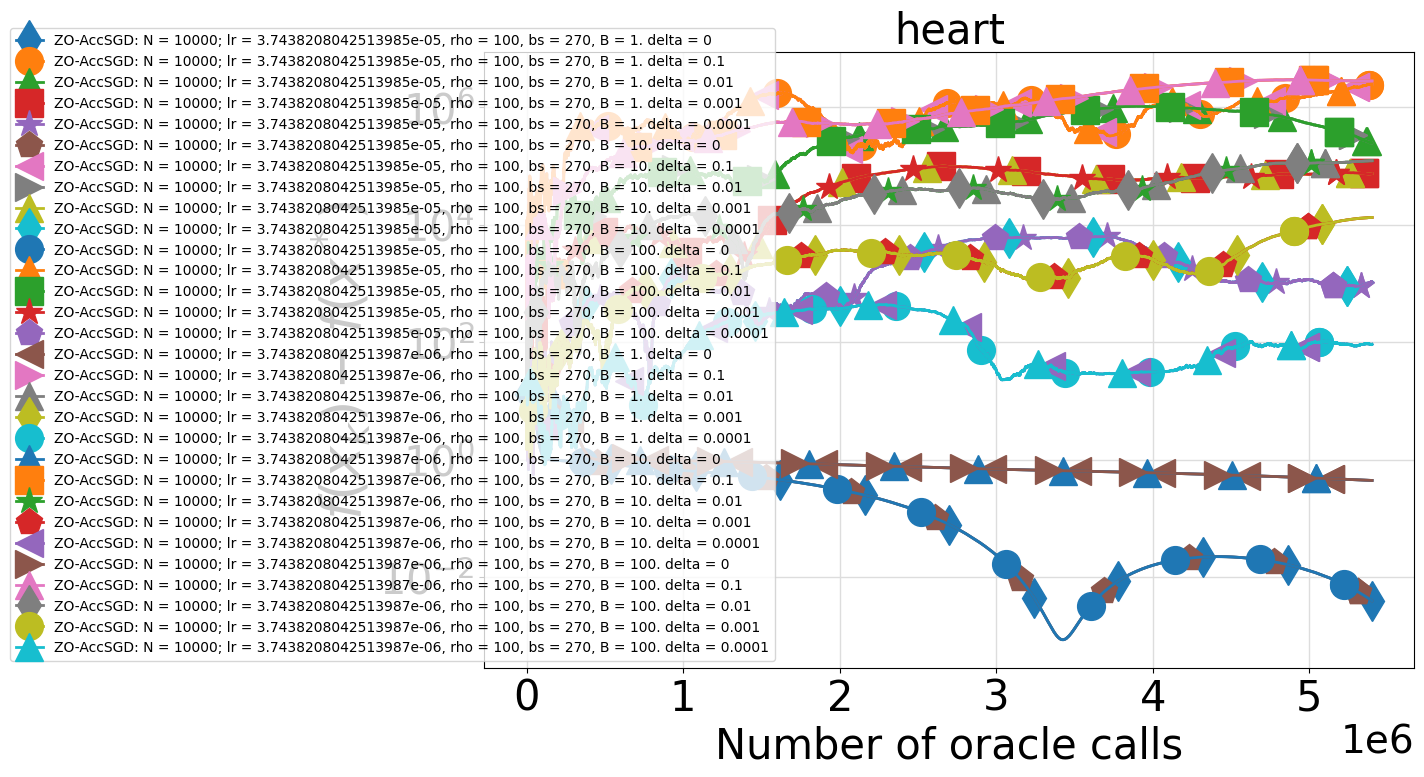

In [15]:
methods = []
N = 10000
stepsizes = [1, 1e-1]
Bs = [1, 10, 100]
bs = A.shape[0]
rhos = [100]
deltas = [0, 0.1, 0.01, 0.001, 0.0001]
for step_param in stepsizes:
    for B in Bs:
        for delta in deltas: 
            for rho in rhos:
                methods.append(['Our_algorithm logreg', [step_param, N, delta, bs, B, rho],
                        f"ZO-AccSGD: N = {N}; lr = {(1 / L) * step_param}, rho = {rho}, bs = {bs}, B = {B}. delta = {delta}", None])


mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 10
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (0.32,0)
legend_loc=4

save_fig = [True, filename+"Our_algorithm"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

In [22]:
N = 10000
stepsizes = [1]
Bs = [10]
bs = A.shape[0]
rhos = [1e3, 1e4]
deltas = [0]
for step_param in stepsizes:
    for B in Bs:
        for delta in deltas: 
            for rho in rhos:
                param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, rho, B, t]
                Our_method = ZO_AccSGD(filename, x_init, args=param, bs=bs, N=N,
                                    f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
                print('Finished with lr = {}, bs = {}, rho = {}'.format((1 / L) * step_param, bs, rho))

100%|██████████| 10000/10000 [00:53<00:00, 188.37it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 1000.0


100%|██████████| 10000/10000 [00:52<00:00, 189.88it/s]

Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 10000.0


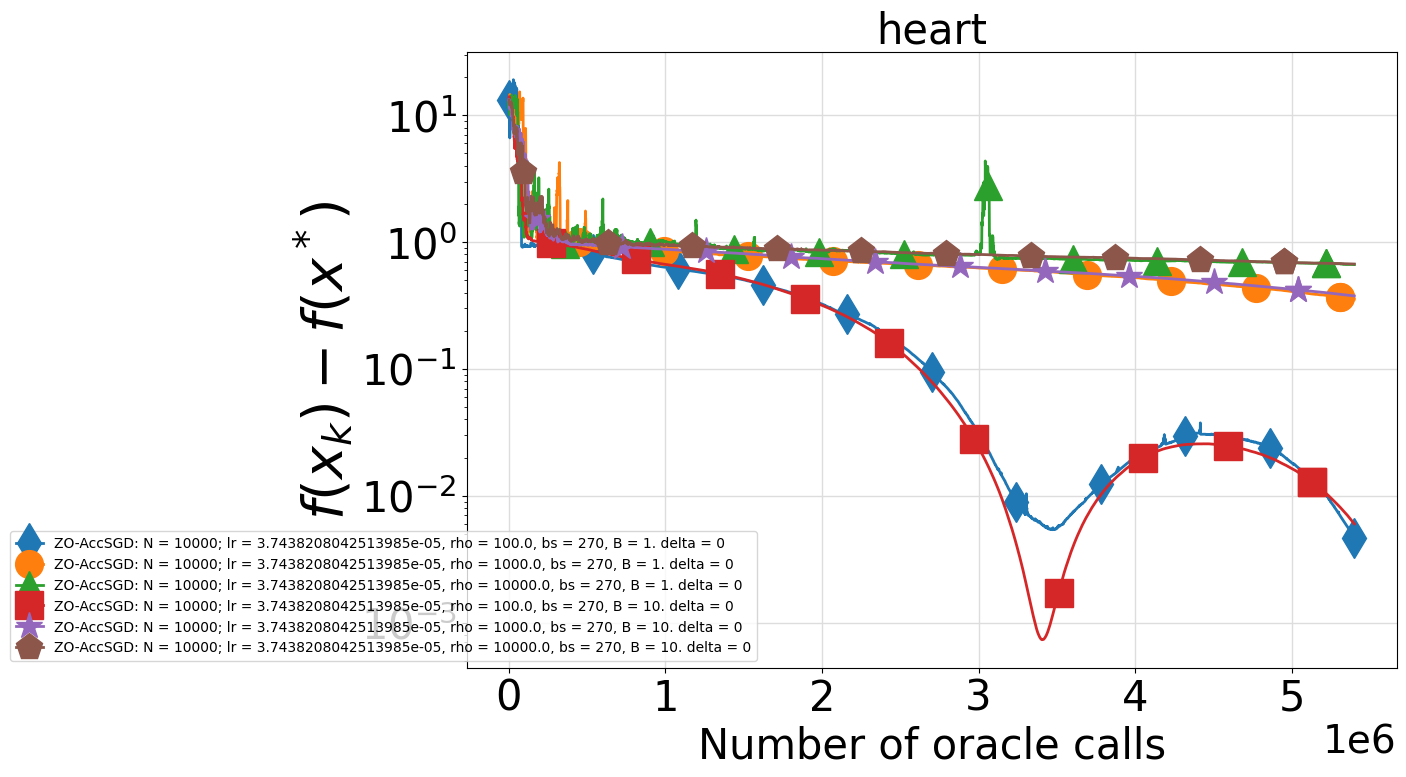

In [23]:
methods = []
N = 10000
stepsizes = [1]
Bs = [1, 10]
bs = A.shape[0]
rhos = [1e2, 1e3, 1e4]
deltas = [0]
for step_param in stepsizes:
    for B in Bs:
        for delta in deltas: 
            for rho in rhos:
                methods.append(['Our_algorithm logreg', [step_param, N, delta, bs, B, rho],
                        f"ZO-AccSGD: N = {N}; lr = {(1 / L) * step_param}, rho = {rho}, bs = {bs}, B = {B}. delta = {delta}", None])


mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 10
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (0.32,0)
legend_loc=4

save_fig = [True, filename+"Our_algorithm"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

In [24]:
N = 100000
stepsizes = [1]
Bs = [10]
bs = A.shape[0]
rhos = [1e2]
deltas = [0]
for step_param in stepsizes:
    for B in Bs:
        for delta in deltas: 
            for rho in rhos:
                param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, rho, B, t]
                Our_method = ZO_AccSGD(filename, x_init, args=param, bs=bs, N=N,
                                    f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
                print('Finished with lr = {}, bs = {}, rho = {}'.format((1 / L) * step_param, bs, rho))

100%|██████████| 100000/100000 [08:45<00:00, 190.35it/s]

Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100.0


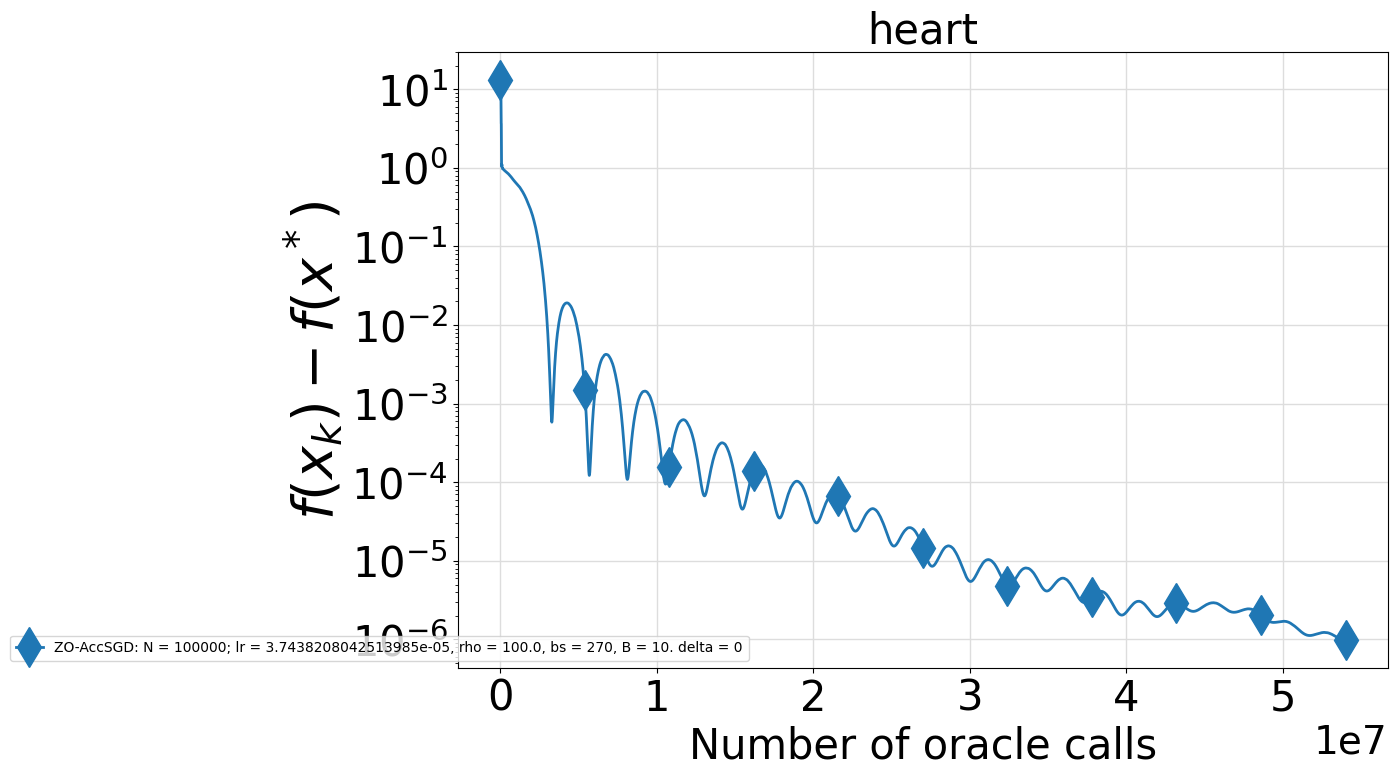

In [48]:
methods = []
N = 100000
stepsizes = [1]
Bs = [10]
bs = A.shape[0]
rhos = [1e2]
deltas = [0]
for step_param in stepsizes:
    for B in Bs:
        for delta in deltas: 
            for rho in rhos:
                methods.append(['Our_algorithm logreg', [step_param, N, delta, bs, B, rho],
                        f"ZO-AccSGD: N = {N}; lr = {(1 / L) * step_param}, rho = {rho}, bs = {bs}, B = {B}. delta = {delta}", None])


mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 10
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (0.32,0)
legend_loc=4

save_fig = [True, filename+"Our_algorithm"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### ARDFDS_E

In [43]:
%%time
N = 30000
stepsizes = [1]
bs = 10
delta = 0
for step_param in stepsizes:
    param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, t]
    ardfds_e_res = ardfds_e_noise_logreg(filename, x_init, args=param, bs=bs, N=N,
                            f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

100%|██████████| 810000/810000 [00:55<00:00, 14702.01it/s]


Finished with stepsize parameter =  1
CPU times: total: 55.2 s
Wall time: 55.1 s


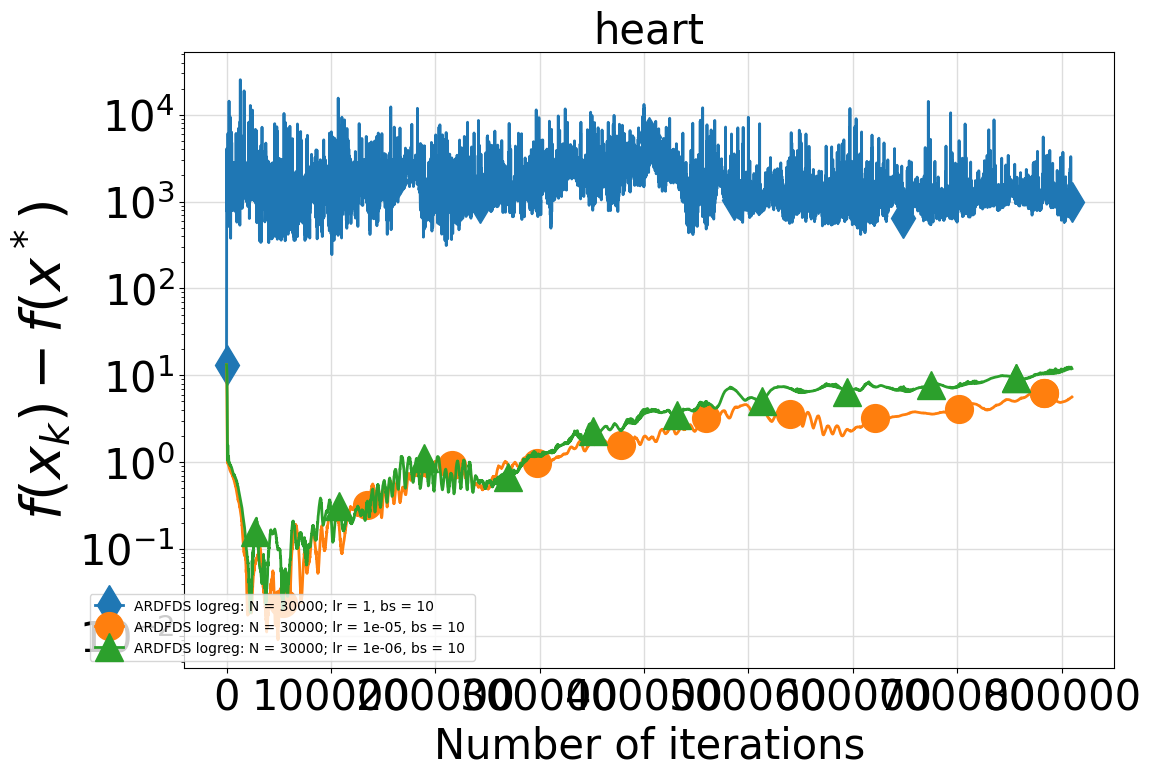

In [44]:
methods = []
N = 30000
stepsizes = [1, 1e-5, 1e-6]
bs = 10
delta = 0
for step_param in stepsizes:
    methods.append(['ARDFDS_E logreg', [step_param, N, delta, bs],
                        f"ARDFDS logreg: N = {N}; lr = {step_param}, bs = {bs} ", None])

mode_y = 'func_vals'
mode_x = 'iters'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 10
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (0.32,0)
legend_loc=4

save_fig = [True, filename+"ARDFDS_E_logreg"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

In [41]:
%%time
N = 100000
stepsizes = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
bs = A.shape[0]
delta = 0
for step_param in stepsizes:
    param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, t]
    rdfds_e_res = rdfds_e_noise_logreg(filename, x_init, args=param, bs=bs, N=N,
                            f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

100%|██████████| 100000/100000 [00:08<00:00, 11631.19it/s]


Finished with stepsize parameter =  0.001


100%|██████████| 100000/100000 [00:08<00:00, 11470.38it/s]


Finished with stepsize parameter =  0.0001


100%|██████████| 100000/100000 [00:08<00:00, 11378.98it/s]


Finished with stepsize parameter =  1e-05


100%|██████████| 100000/100000 [00:08<00:00, 11607.54it/s]


Finished with stepsize parameter =  1e-06


100%|██████████| 100000/100000 [00:08<00:00, 11521.53it/s]

Finished with stepsize parameter =  1e-07
CPU times: total: 46.5 s
Wall time: 46.5 s


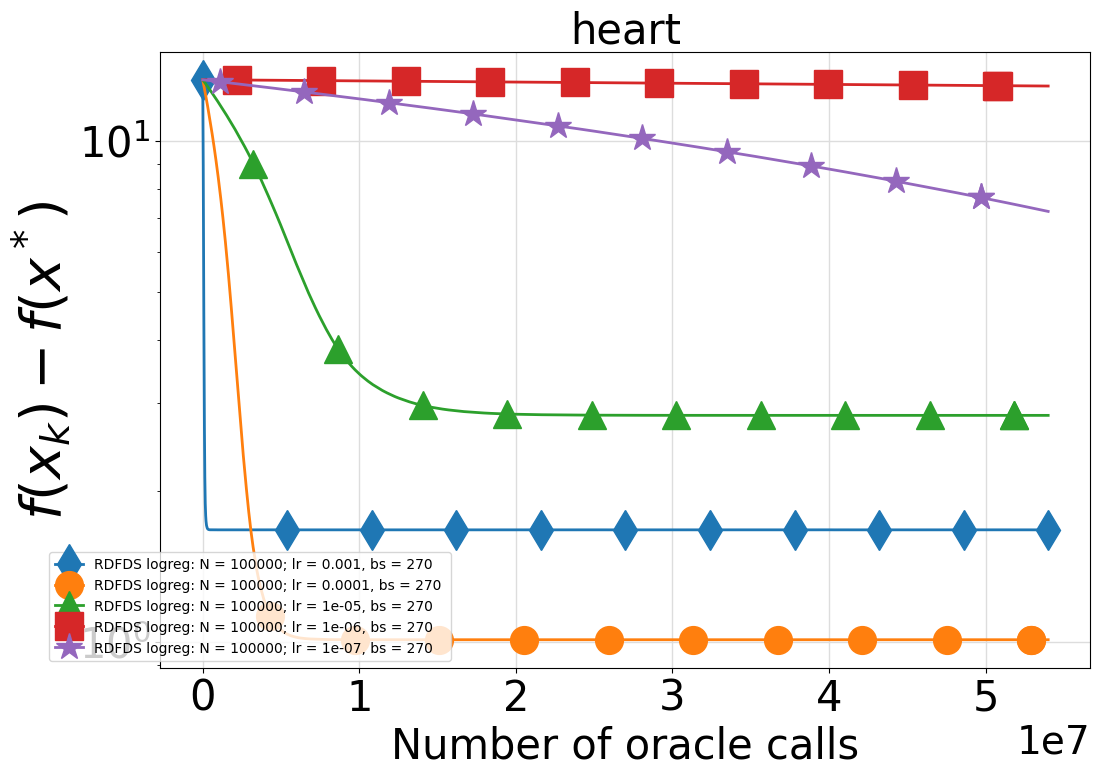

In [42]:
methods = []
N = 100000
stepsizes = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
bs = A.shape[0]
delta = 0
for step_param in stepsizes:
    methods.append(['RDFDS_E logreg', [step_param, N, delta, bs],
                        f"RDFDS logreg: N = {N}; lr = {step_param}, bs = {bs} ", None])

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 10
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (0.32,0)
legend_loc=4

save_fig = [True, filename+"RDFDS_E_logreg"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

In [51]:
%%time
N = 100000
stepsizes = [1e-2]
bs = 100
delta = 0
for step_param in stepsizes:
    param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, t]
    VARAG = ZO_VARAG(filename, x_init, args=param, bs=bs, N=N,
                            f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

100%|██████████| 270000/270000 [01:01<00:00, 4377.46it/s]

Finished with stepsize parameter =  0.01
CPU times: total: 1min 1s
Wall time: 1min 1s


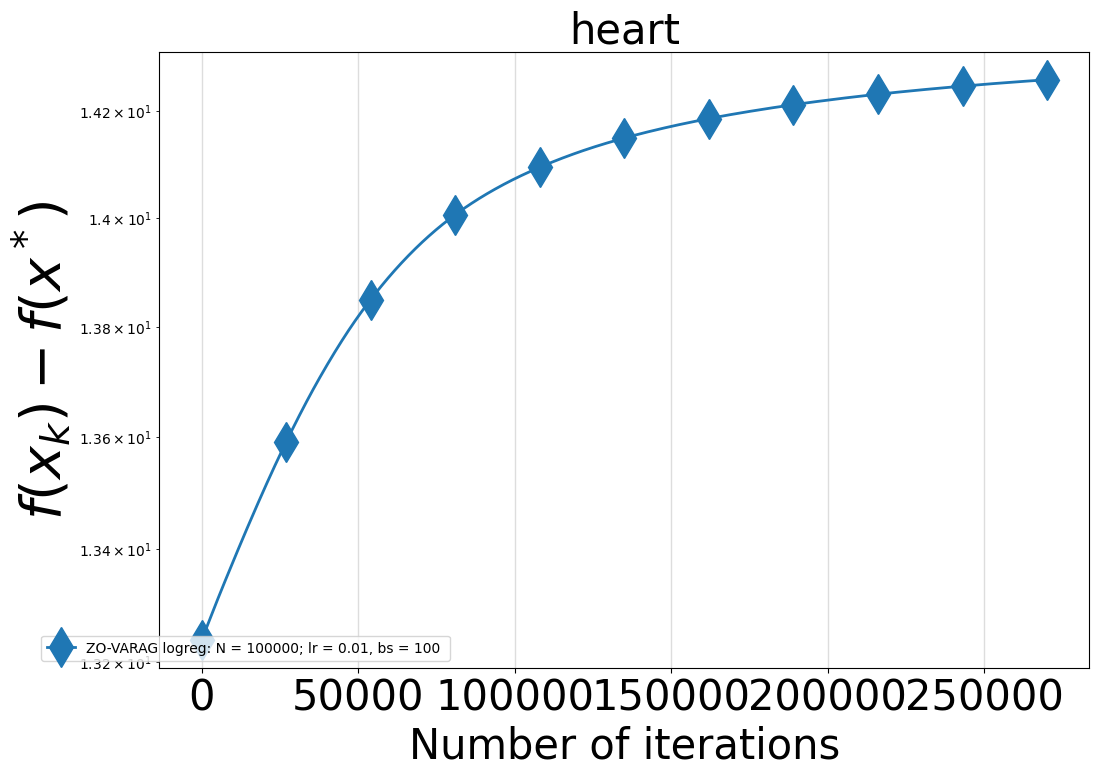

In [52]:
methods = []
N = 100000
stepsizes = [1e-2]
bs = 100
delta = 0
for step_param in stepsizes:
    methods.append(['ZO_VARAG logreg', [step_param, N, delta, bs],
                        f"ZO-VARAG logreg: N = {N}; lr = {step_param}, bs = {bs} ", None])

mode_y = 'func_vals'
mode_x = 'iters'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 10
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (0.32,0)
legend_loc=4

save_fig = [True, filename+"RDFDS_E_logreg"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots) 

In [ ]:
N = 50000
stepsizуs = [1]
bs = 200
rhos = [400]
deltas = [0]

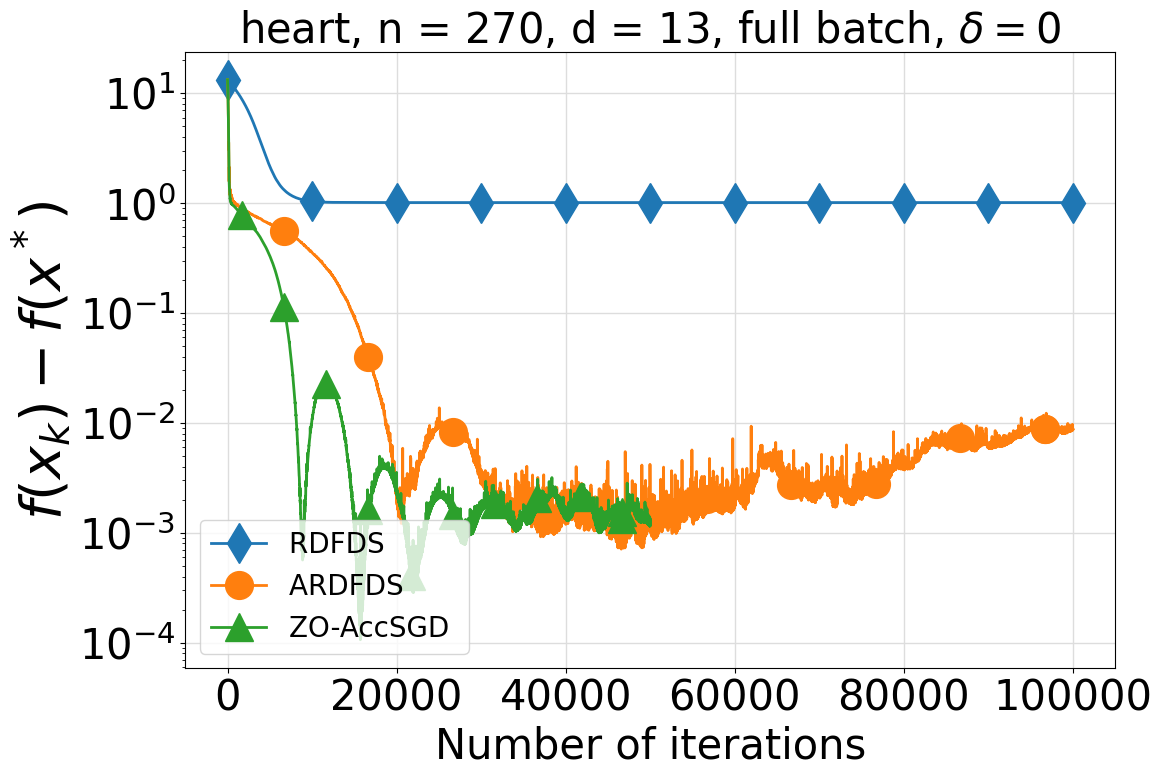

In [16]:
methods = []
methods.append(['RDFDS_E logreg', [1e-4, 100000, 0, 270],
                                  "RDFDS ", None])
# methods.append(['ZO_VARAG logreg', [1e-6, N, delta, bs],
#                                   "ZO-VARAG ", None])
methods.append(['ARDFDS_E logreg', [1e-4, 100000, 0, 270],
                                  "ARDFDS ", None])
methods.append(['Our_algorithm logreg', [1, 50000, 0, 200, 400],
                                  "ZO-AccSGD ", None])

mode_y = 'func_vals'
mode_x = 'iters'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'heart, n = 270, d = 13, full batch, $\delta = 0$'
bbox_to_anchor = (0.32,0)
legend_loc=4

save_fig = [True, filename+"heart_comparison"+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

In [26]:
N = 100000
stepsizes = [1]
Bs = [1, 10]
bs = A.shape[0]
rhos = [100]
deltas = [1e-6, 1e-8]
for step_param in stepsizes:
    for B in Bs:
        for delta in deltas: 
            for rho in rhos:
                param = [logreg_loss, A, y, l2, sparse, sparse_full, L, delta, rho, B, t]
                Our_method = ZO_AccSGD(filename, x_init, args=param, bs=bs, N=N,
                                    f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
                print('Finished with lr = {}, bs = {}, rho = {}'.format((1 / L) * step_param, bs, rho))

100%|██████████| 100000/100000 [00:58<00:00, 1708.65it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 100000/100000 [00:56<00:00, 1757.33it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 100000/100000 [08:54<00:00, 187.25it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 100000/100000 [08:56<00:00, 186.25it/s]


Finished with lr = 3.7438208042513985e-05, bs = 270, rho = 100


100%|██████████| 100000/100000 [00:56<00:00, 1766.83it/s]


Finished with lr = 3.7438208042513987e-06, bs = 270, rho = 100


  1%|          | 732/100000 [00:00<00:58, 1684.73it/s]


KeyboardInterrupt: 